# Industry 4.0 의 중심, AI - ML&DL

<div align='right'><font size=2 color='gray'>Machine Learning & Deep Learning with TensorFlow @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, 김진수</font></div>
<hr>

# Sect7. Learning rate, Evaluation

In [1]:
from images import bigpycraft_ai as bpc
from IPython.display import Image 
from tqdm import tqdm_notebook

### Training and Test datasets

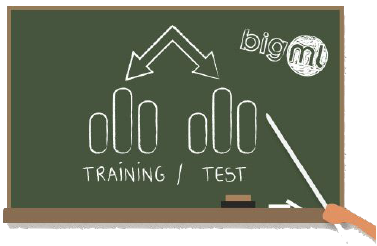

In [2]:
bpc.Figure(bpc.ML07_IMG_01)

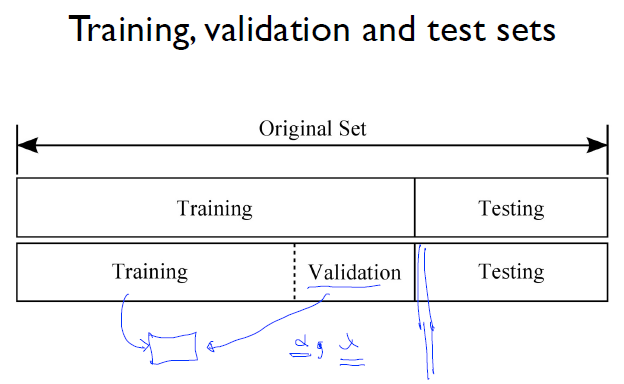

In [3]:
bpc.Figure(bpc.ML07_IMG_02)

### learning_rate 에 따른 학습
> 
- Case1 : learning_rate = 0.1
- Case2 : learning_rate = 1.5
- Case3 : learning_rate = 1e-5

### <font color='brown'> Case1 : learning_rate = 0.1 </font>

In [4]:
# import tensorflow as tf
import tensorflow.compat.v1 as tf
import numpy as np

tf.disable_v2_behavior()

tf.set_random_seed(777)  # for reproducibility

learning_rate = 0.1

x_data = [[1, 2, 1], [1, 3, 2], [1, 3, 4], [1, 5, 5], [1, 7, 5], [1, 2, 5], [1, 6, 6], [1, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

# Evaluation our model using this test dataset
x_test = [[2, 1, 1], [3, 1, 2], [3, 3, 4]]
y_test = [[0, 0, 1], [0, 0, 1], [0, 0, 1]]

X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])

W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

# Try to change learning_rate to small numbers
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=learning_rate).minimize(cost)

# Correct prediction Test model
prediction = tf.arg_max(hypothesis, 1)
is_correct = tf.equal(prediction, tf.arg_max(Y, 1))
accuracy   = tf.reduce_mean(tf.cast(is_correct, tf.float32))


Instructions for updating:
non-resource variables are not supported in the long term


In [5]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in tqdm_notebook(range(201)):
        cost_val, W_val, _ = sess.run(
            [cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
        if step%20 == 0:
            print("\n Step : {} \n Cost : {} \n Weight : \n{}".format(step, cost_val, W_val))

    print("-"*60)
    # predict
    print("Prediction \t:", sess.run(prediction, feed_dict={X: x_test}))
    # Calculate the accuracy
    print("Accuracy \t: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))

C:\Users\student\AppData\Local\Temp\ipykernel_12216\1740277439.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for step in tqdm_notebook(range(201)):


  0%|          | 0/201 [00:00<?, ?it/s]


 Step : 0 
 Cost : 1.155854344367981 
 Weight : 
[[ 0.5807229   0.53629667  0.28503624]
 [-0.880366   -0.5175341  -0.27097937]
 [ 1.1865109   0.58328104 -0.3828085 ]]

 Step : 20 
 Cost : 0.7688493132591248 
 Weight : 
[[ 0.40574715  0.53113014  0.46517852]
 [-0.73076063 -0.63655484 -0.30156383]
 [ 0.9436721   0.6735301  -0.23021881]]

 Step : 40 
 Cost : 0.7116864323616028 
 Weight : 
[[ 0.27420008  0.5205634   0.60729223]
 [-0.60690033 -0.659697   -0.402282  ]
 [ 0.86692965  0.7036612  -0.18360734]]

 Step : 60 
 Cost : 0.6756377220153809 
 Weight : 
[[ 0.15997703  0.50832677  0.73375195]
 [-0.53524226 -0.6555718  -0.4780651 ]
 [ 0.83825815  0.7069336  -0.15820816]]

 Step : 80 
 Cost : 0.6490779519081116 
 Weight : 
[[ 0.05690726  0.4979818   0.8471665 ]
 [-0.49117976 -0.6439646  -0.5337348 ]
 [ 0.8338666   0.70292753 -0.14981046]]

 Step : 100 
 Cost : 0.6278733015060425 
 Weight : 
[[-0.03823642  0.4903813   0.9499105 ]
 [-0.46281245 -0.6319019  -0.5741645 ]
 [ 0.8426072   0.6977

### <font color='brown'> Case2 : learning_rate = 1.5 </font>

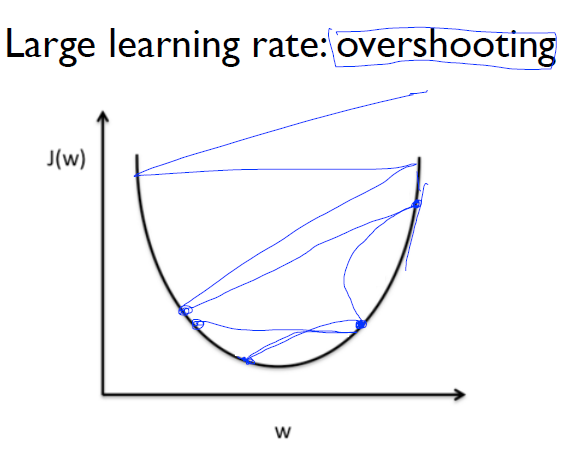

In [6]:
bpc.Figure(bpc.ML07_IMG_03)

In [7]:
# import tensorflow as tf
import tensorflow.compat.v1 as tf
import numpy as np

tf.disable_v2_behavior()

tf.set_random_seed(777)  # for reproducibility

learning_rate = 1.5

x_data = [[1, 2, 1], [1, 3, 2], [1, 3, 4], [1, 5, 5], [1, 7, 5], [1, 2, 5], [1, 6, 6], [1, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

# Evaluation our model using this test dataset
x_test = [[2, 1, 1], [3, 1, 2], [3, 3, 4]]
y_test = [[0, 0, 1], [0, 0, 1], [0, 0, 1]]

X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])

W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

# Try to change learning_rate to small numbers
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=learning_rate).minimize(cost)

# Correct prediction Test model
prediction = tf.arg_max(hypothesis, 1)
is_correct = tf.equal(prediction, tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))


In [8]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(201):
        cost_val, W_val, _ = sess.run(
            [cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
        if step%20 == 0 or step<5:
            print("\n Step : {} \n Cost : {} \n Weight : \n{}".format(step, cost_val, W_val))
    print("-"*60)
    # predict
    print("Prediction \t:", sess.run(prediction, feed_dict={X: x_test}))
    # Calculate the accuracy
    print("Accuracy \t: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))



 Step : 0 
 Cost : 8.919841766357422 
 Weight : 
[[-1.7972682  -0.5177834   1.0523719 ]
 [-2.5559282   1.0526279  -0.23129797]
 [-4.7017136   2.066355    1.4383435 ]]

 Step : 1 
 Cost : 17.79096221923828 
 Weight : 
[[-1.4222683  -1.3623906   1.5219792 ]
 [-0.11842847 -2.680078    1.0639079 ]
 [-2.2642136  -1.5311568   2.5983553 ]]

 Step : 2 
 Cost : 26.768442153930664 
 Weight : 
[[-1.0472769  -0.79989064  0.5844878 ]
 [ 2.3190544  -0.05507803 -3.998575  ]
 [ 0.17327785  1.2813432  -2.6516361 ]]

 Step : 3 
 Cost : 11.625502586364746 
 Weight : 
[[-2.129352  -0.2803154  1.1469877]
 [-1.7181575  2.4821339 -2.4985752]
 [-3.741623   3.8837435 -1.3391361]]

 Step : 4 
 Cost : 28.18202018737793 
 Weight : 
[[-1.7543521  -1.2178149   1.7094872 ]
 [ 0.71934247 -1.4553654  -0.99857616]
 [-1.3041229   0.133744   -0.0266366 ]]

 Step : 20 
 Cost : nan 
 Weight : 
[[nan nan nan]
 [nan nan nan]
 [nan nan nan]]

 Step : 40 
 Cost : nan 
 Weight : 
[[nan nan nan]
 [nan nan nan]
 [nan nan nan]]



### <font color='brown'> Case3 : learning_rate = 1e-5 </font>

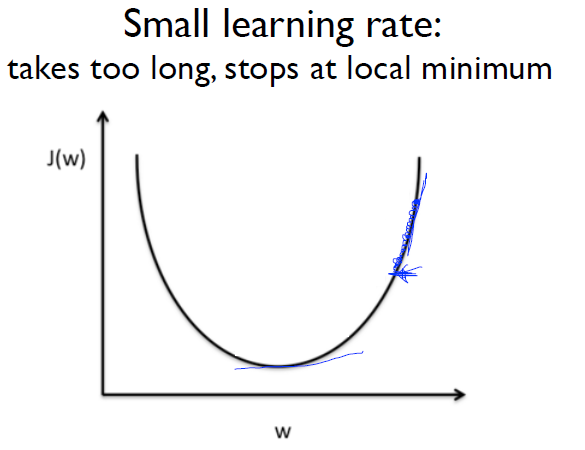

In [9]:
bpc.Figure(bpc.ML07_IMG_04)

In [10]:
# import tensorflow as tf
import tensorflow.compat.v1 as tf
import numpy as np

tf.disable_v2_behavior()

tf.set_random_seed(777)  # for reproducibility

learning_rate = 1e-5

x_data = [[1, 2, 1], [1, 3, 2], [1, 3, 4], [1, 5, 5], [1, 7, 5], [1, 2, 5], [1, 6, 6], [1, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

# Evaluation our model using this test dataset
x_test = [[2, 1, 1], [3, 1, 2], [3, 3, 4]]
y_test = [[0, 0, 1], [0, 0, 1], [0, 0, 1]]

X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])

W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

# Try to change learning_rate to small numbers
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=learning_rate).minimize(cost)

# Correct prediction Test model
prediction = tf.arg_max(hypothesis, 1)
is_correct = tf.equal(prediction, tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))


In [11]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(201):
        cost_val, W_val, _ = sess.run(
            [cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
        if step%20 == 0:
            print("\n Step : {} \n Cost : {} \n Weight : \n{}".format(step, cost_val, W_val))

    print("-"*60)
    # predict
    print("Prediction \t:", sess.run(prediction, feed_dict={X: x_test}))
    # Calculate the accuracy
    print("Accuracy \t: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))



 Step : 0 
 Cost : 10.527496337890625 
 Weight : 
[[-0.86436135 -0.27789357 -0.653295  ]
 [-0.45466328 -0.6348425   1.9650499 ]
 [ 0.50487757 -0.27065706  1.0446575 ]]

 Step : 20 
 Cost : 10.52020263671875 
 Weight : 
[[-0.86431247 -0.27781907 -0.65341896]
 [-0.45434022 -0.63449323  1.9643775 ]
 [ 0.5052018  -0.27028215  1.0439589 ]]

 Step : 40 
 Cost : 10.512909889221191 
 Weight : 
[[-0.8642636  -0.27774456 -0.65354294]
 [-0.45401716 -0.63414395  1.9637052 ]
 [ 0.50552607 -0.26990724  1.0432603 ]]

 Step : 60 
 Cost : 10.505617141723633 
 Weight : 
[[-0.8642147  -0.27767006 -0.6536669 ]
 [-0.4536941  -0.63379467  1.9630328 ]
 [ 0.5058503  -0.26953232  1.0425618 ]]

 Step : 80 
 Cost : 10.498323440551758 
 Weight : 
[[-0.86416584 -0.27759555 -0.6537909 ]
 [-0.45337105 -0.6334454   1.9623605 ]
 [ 0.50617456 -0.2691574   1.0418632 ]]

 Step : 100 
 Cost : 10.491029739379883 
 Weight : 
[[-0.86411697 -0.27752104 -0.65391487]
 [-0.453048   -0.6330961   1.9616882 ]
 [ 0.5064988  -0.2687

### Non-normalized inputs
> Linear regression without min, max
- 너무나 심플하고 멋진 모델임에도 불구하고 학습해보면 NaN 이 발생
- 해결방안 : Nomalized 한다거나, MinMaxScaler 함수 사용

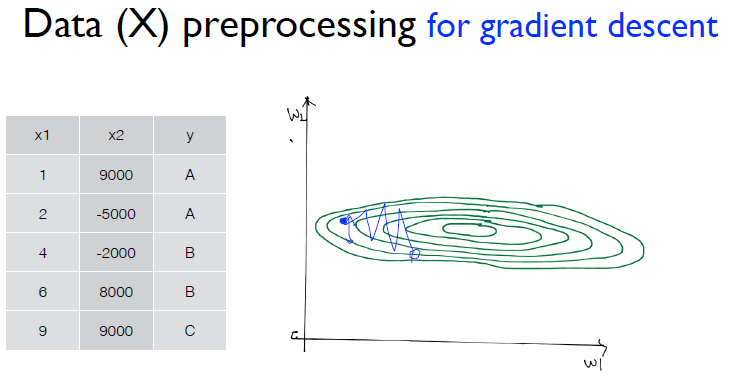

In [12]:
bpc.Figure(bpc.ML07_IMG_05)

In [13]:
# import tensorflow as tf
import tensorflow.compat.v1 as tf
import numpy as np

tf.disable_v2_behavior()

tf.set_random_seed(777)  # for reproducibility

xy = np.array([[828.659973, 833.450012, 908100,  828.349976, 831.659973],
               [823.02002,  828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998,  824.159973],
               [816,        820.958984, 1008100, 815.48999,  819.23999 ],
               [819.359985, 823,        1188100, 818.469971, 818.97998 ],
               [819,        823,        1198100, 816,        820.450012],
               [811.700012, 815.25,     1098100, 809.780029, 813.669983],
               [809.51001,  816.659973, 1398100, 804.539978, 809.559998]])
# print(xy)

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]
print(" x_data : \n{}  \n\n y_data : \n{}".format(x_data, y_data))

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([4, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)


 x_data : 
[[8.28659973e+02 8.33450012e+02 9.08100000e+05 8.28349976e+02]
 [8.23020020e+02 8.28070007e+02 1.82810000e+06 8.21655029e+02]
 [8.19929993e+02 8.24400024e+02 1.43810000e+06 8.18979980e+02]
 [8.16000000e+02 8.20958984e+02 1.00810000e+06 8.15489990e+02]
 [8.19359985e+02 8.23000000e+02 1.18810000e+06 8.18469971e+02]
 [8.19000000e+02 8.23000000e+02 1.19810000e+06 8.16000000e+02]
 [8.11700012e+02 8.15250000e+02 1.09810000e+06 8.09780029e+02]
 [8.09510010e+02 8.16659973e+02 1.39810000e+06 8.04539978e+02]]  

 y_data : 
[[831.659973]
 [828.070007]
 [824.159973]
 [819.23999 ]
 [818.97998 ]
 [820.450012]
 [813.669983]
 [809.559998]]


In [14]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(101):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    print("Step : {}, \t Cost : {}".format(step, cost_val))
    # print("\n step : {}, \n Cost : {} \n Prediction : {}".format(step, cost_val, hy_val))

Step : 0, 	 Cost : 1369477742592.0
Step : 1, 	 Cost : 1.5046184202529905e+27
Step : 2, 	 Cost : inf
Step : 3, 	 Cost : inf
Step : 4, 	 Cost : inf
Step : 5, 	 Cost : inf
Step : 6, 	 Cost : nan
Step : 7, 	 Cost : nan
Step : 8, 	 Cost : nan
Step : 9, 	 Cost : nan
Step : 10, 	 Cost : nan
Step : 11, 	 Cost : nan
Step : 12, 	 Cost : nan
Step : 13, 	 Cost : nan
Step : 14, 	 Cost : nan
Step : 15, 	 Cost : nan
Step : 16, 	 Cost : nan
Step : 17, 	 Cost : nan
Step : 18, 	 Cost : nan
Step : 19, 	 Cost : nan
Step : 20, 	 Cost : nan
Step : 21, 	 Cost : nan
Step : 22, 	 Cost : nan
Step : 23, 	 Cost : nan
Step : 24, 	 Cost : nan
Step : 25, 	 Cost : nan
Step : 26, 	 Cost : nan
Step : 27, 	 Cost : nan
Step : 28, 	 Cost : nan
Step : 29, 	 Cost : nan
Step : 30, 	 Cost : nan
Step : 31, 	 Cost : nan
Step : 32, 	 Cost : nan
Step : 33, 	 Cost : nan
Step : 34, 	 Cost : nan
Step : 35, 	 Cost : nan
Step : 36, 	 Cost : nan
Step : 37, 	 Cost : nan
Step : 38, 	 Cost : nan
Step : 39, 	 Cost : nan
Step : 40, 	 Cost :

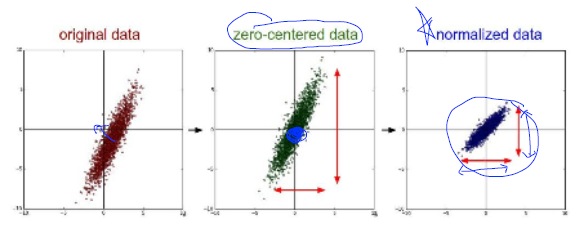

In [15]:
bpc.Figure(bpc.ML07_IMG_06)

### Linear regression with min, max

In [16]:
a = np.arange(4).reshape((2,2))
a

array([[0, 1],
       [2, 3]])

In [17]:
np.min(a)

0

In [18]:
np.min(a, axis=0)

array([0, 1])

In [19]:
np.min(a, axis=1)

array([0, 2])

In [20]:
# import tensorflow as tf
import tensorflow.compat.v1 as tf
import numpy as np

tf.disable_v2_behavior()

tf.set_random_seed(777)  # for reproducibility

def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    print(" max.data :\n {max}, \n\n min.data :\n {min}, \n\n numerator :\n {numerator}, \n\n denominator :\n {denominator} \n".format(
            max = np.max(data, 0), 
            min = np.min(data, 0),
            numerator = numerator,
            denominator = denominator
        ))

    # noise term prevents the zero division
    return numerator / (denominator + 1e-5)


xy = np.array([[828.659973, 833.450012, 908100,  828.349976, 831.659973],
               [823.02002,  828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998,  824.159973],
               [816,        820.958984, 1008100, 815.48999,  819.23999 ],
               [819.359985, 823,        1188100, 818.469971, 818.97998 ],
               [819,        823,        1198100, 816,        820.450012],
               [811.700012, 815.25,     1098100, 809.780029, 813.669983],
               [809.51001,  816.659973, 1398100, 804.539978, 809.559998]])

# print("np.max(xy, 0) :", np.max(xy, 0))
# print("np.min(xy, 0) :", np.min(xy, 0))

# very important. It does not work without it.
xy = MinMaxScaler(xy)
print(" xy : MinMaxScaler(xy) = numerator / (denominator + 1e-7) \n", xy)

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]
print("\n x_data : \n{}  \n\n y_data : \n{}".format(x_data, y_data))

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([4, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)


 max.data :
 [8.28659973e+02 8.33450012e+02 1.82810000e+06 8.28349976e+02
 8.31659973e+02], 

 min.data :
 [8.09510010e+02 8.15250000e+02 9.08100000e+05 8.04539978e+02
 8.09559998e+02], 

 numerator :
 [[1.9149963e+01 1.8200012e+01 0.0000000e+00 2.3809998e+01 2.2099975e+01]
 [1.3510010e+01 1.2820007e+01 9.2000000e+05 1.7115051e+01 1.8510009e+01]
 [1.0419983e+01 9.1500240e+00 5.3000000e+05 1.4440002e+01 1.4599975e+01]
 [6.4899900e+00 5.7089840e+00 1.0000000e+05 1.0950012e+01 9.6799920e+00]
 [9.8499750e+00 7.7500000e+00 2.8000000e+05 1.3929993e+01 9.4199820e+00]
 [9.4899900e+00 7.7500000e+00 2.9000000e+05 1.1460022e+01 1.0890014e+01]
 [2.1900020e+00 0.0000000e+00 1.9000000e+05 5.2400510e+00 4.1099850e+00]
 [0.0000000e+00 1.4099730e+00 4.9000000e+05 0.0000000e+00 0.0000000e+00]], 

 denominator :
 [1.9149963e+01 1.8200012e+01 9.2000000e+05 2.3809998e+01 2.2099975e+01] 

 xy : MinMaxScaler(xy) = numerator / (denominator + 1e-7) 
 [[0.99999948 0.99999945 0.         0.99999958 0.99999955]
 [

In [21]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

prev_cost = 1
for step in tqdm_notebook(range(1001)):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    
    if step%10 == 0:
        # print("\nStep", step, "\nCost:", cost_val, "\nPrediction:\n", hy_val)
        # print("Step : {}, \t Cost : {}".format(step, cost_val))
        improvement =  prev_cost - cost_val
        prev_cost = cost_val
        print("Step : {}, \t Cost : {}, \t Improvement : {}".format(step, cost_val,  improvement))

C:\Users\student\AppData\Local\Temp\ipykernel_12216\704651080.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for step in tqdm_notebook(range(1001)):


  0%|          | 0/1001 [00:00<?, ?it/s]

Step : 0, 	 Cost : 1.4778214693069458, 	 Improvement : -0.4778214693069458
Step : 10, 	 Cost : 1.4770689010620117, 	 Improvement : 0.000752568244934082
Step : 20, 	 Cost : 1.4763163328170776, 	 Improvement : 0.000752568244934082
Step : 30, 	 Cost : 1.47556471824646, 	 Improvement : 0.0007516145706176758
Step : 40, 	 Cost : 1.4748140573501587, 	 Improvement : 0.0007506608963012695
Step : 50, 	 Cost : 1.4740638732910156, 	 Improvement : 0.0007501840591430664
Step : 60, 	 Cost : 1.4733147621154785, 	 Improvement : 0.0007491111755371094
Step : 70, 	 Cost : 1.472565770149231, 	 Improvement : 0.0007489919662475586
Step : 80, 	 Cost : 1.4718174934387207, 	 Improvement : 0.0007482767105102539
Step : 90, 	 Cost : 1.4710698127746582, 	 Improvement : 0.0007476806640625
Step : 100, 	 Cost : 1.4703221321105957, 	 Improvement : 0.0007476806640625
Step : 110, 	 Cost : 1.4695754051208496, 	 Improvement : 0.0007467269897460938
Step : 120, 	 Cost : 1.4688295125961304, 	 Improvement : 0.00074589252471923

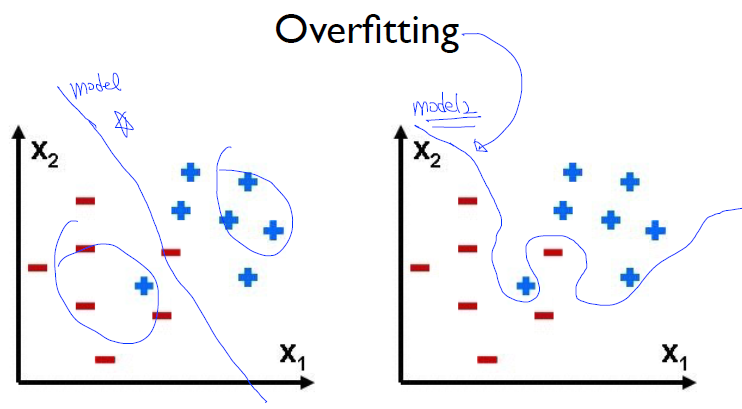

In [22]:
bpc.Figure(bpc.ML07_IMG_07, 600)

# <font color='Orange'> Solution for Overfitting </font>
> 
- More training Data !
- Reduce the number of features
- Regularization 


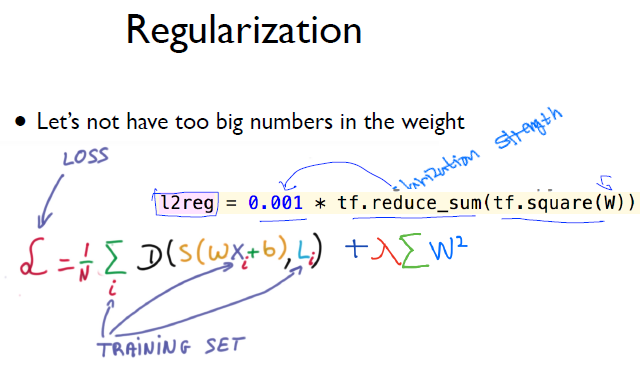

In [23]:
bpc.Figure(bpc.ML07_IMG_08)

### Mnist Introduction

### <font color="#CC0000">MNIST
> MNIST (Modified National Institute of Standards and Technology) 
> - MNIST is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. 
> - As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.


#### 손글씨 숫자데이터
> 미국 우편국에서 우편번호를 분리하기 위해 손글씨 데이터를 머신러닝에 적용
<!--
![Graph](./images/lab07_mnist_dataset.png)
//-->

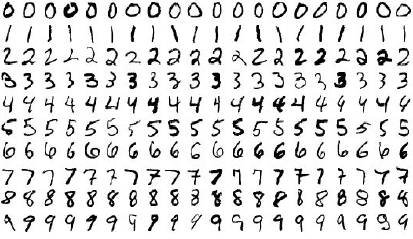

In [24]:
bpc.Figure(bpc.ML07_IMG_09)

### training & test set
<!--
![Graph](./images/lab07_mnist_traindata.png)
//-->

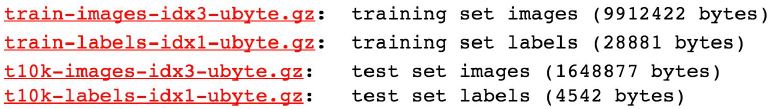

In [25]:
bpc.Figure(bpc.ML07_IMG_10)

# from tensorflow.examples.tutorials.mnist import input_data
# mnist = input_data.read_data_sets("data/MNIST_data/", one_hot=True)

### In the Neural Network terminology
> 
> - one epoch = one forward pass and one backward pass of all the training examples
> - batch size = the number of training examples in one forward/backward pass. The higher the batch size, the more memory space you'll need.
> - number of iterations = number of passes, each pass using [batch size] number of examples. To be clear, one pass = one forward pass + one backward pass (we do not count the forward pass and backward pass as two different passes).
> <br><br>Example: if you have 1000 training examples, and your batch size is 500, then it will take 2 iterations to complete 1 epoch.
> <br><br>
> - In digital circuits, one-hot refers to a group of bits among which the legal combinations of values are only those with a single high (1) bit and all the others low (0).

In [ ]:
<!--

https://whitebearpe.tistory.com/43
    
-->

In [30]:
import tensorflow as tf
# import tf.keras.datasets.mnist as mnist

In [31]:
mnist = tf.keras.datasets.mnist

In [34]:
# help(mnist.load_data)

In [38]:
# !dir data

In [39]:
# mnist_data = mnist.load_data("data/MNIST_data/")

In [26]:
# Learning rate and Evaluation
# import tensorflow as tf
import tensorflow.compat.v1 as tf
import numpy as np

import random
import matplotlib.pyplot as plt

tf.disable_v2_behavior()

tf.set_random_seed(777)  # for reproducibility

# Ref. https://whitebearpe.tistory.com/43
# TF1에서는 MNIST import 가능했지만, TF2에서는 제공안함
# from tensorflow.examples.tutorials.mnist import input_data

# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
# 맨처음 최초한번만 mnist 다운로딩 이후는 로컬데이터 사용
mnist = input_data.read_data_sets("data/MNIST_data/", one_hot=True)

# https://www.tensorflow.org/tutorials/generative/dcgan

nb_classes = 10

# MNIST data image of shape 28 * 28 = 784L
X = tf.placeholder(tf.float32, [None, 784])

# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))

# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))


ModuleNotFoundError: No module named 'tensorflow.examples'

### Training epoch / batch
> 
- epoch : one forward pass and one backward pass of all the training examples
- batch : the number of training examples in one forward/backward pass
- iterations : number of passes, each pass using [batch size]  number of examples
<br><br>Ex. <br>if you have 1000 training examples, and your batch size is 500,
<br>then it will take 2 iterations to complete 1 epoch.

In [ ]:
mnist.train.num_examples

In [ ]:
# parameters
training_epochs = 15
batch_size = 100

with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in tqdm_notebook(range(training_epochs)):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)

        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={
                            X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch

        # print('Epoch:', '%04d' % (epoch + 1),
        #       '\t cost =', '{:.9f}'.format(avg_cost))
        print('Epoch:', '%04d' % (epoch + 1), end='\t')
        print('Cost =', '{:.9f}'.format(avg_cost))

        
    print("Learning finished")
    print("-"*2**6)

    # Test the model using test sets
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={
          X: mnist.test.images, Y: mnist.test.labels}))

    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction: ", sess.run(
        tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

    plt.imshow(mnist.test.images[r:r + 1].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.show()



``` python
# input_data.read_data_sets
Signature: input_data.read_data_sets(train_dir, fake_data=False, one_hot=False, dtype=tf.float32, reshape=True, validation_size=5000, seed=None, source_url='https://storage.googleapis.com/cvdf-datasets/mnist/')
Docstring:
DEPRECATED FUNCTION
```

In [ ]:
# parameters
training_epochs = 15
batch_size = 100

sess = tf.Session()
# Initialize TensorFlow variables
sess.run(tf.global_variables_initializer())
# Training cycle
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost, optimizer], feed_dict={
                        X: batch_xs, Y: batch_ys})
        avg_cost += c / total_batch
        
        if i % (total_batch/100) == 0:
            print('▒', end='')
    
    print(' 100% ')
    print('Epoch:', '%04d' % (epoch + 1), end='\t')
    print('Cost =', '{:.9f}'.format(avg_cost))

print()
print("Learning finished")

# Test the model using test sets
# print("Accuracy: ", accuracy.eval(session=sess, feed_dict={
#       X: mnist.test.images, Y: mnist.test.labels}))

### Report result on test dataset

In [ ]:
# Test the model using test sets
print("Accuracy: ", accuracy.eval(session=sess, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

### Sample image show and prediction
> 
> - 랜덤하게 읽어온 이미지를 예측하여 실제 맞는지를 확인한다.

In [ ]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

plt.imshow(mnist.test.images[r:r + 1].reshape(28,28), cmap='Greys', interpolation='nearest')
plt.show()

In [ ]:
type(mnist.test.num_examples)

In [ ]:
mnist.test.num_examples

In [ ]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("r:", r)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

plt.imshow(mnist.test.images[r:r + 1].reshape(28,28), cmap='Greys', interpolation='nearest')
plt.show()

In [ ]:
for i in range(10):
    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("r:", r)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction: ", sess.run(
        tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

    plt.imshow(mnist.test.images[r:r + 1].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.show()

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>